# • DOMAIN: Electronics and Telecommunication

# • CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.

# Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

# • DATA DESCRIPTION: The data set contains information on various signal tests performed:

# 1. Parameters: Various measurable signal parameters.
# 2. Signal_Quality: Final signal strength or quality

# • PROJECT OBJECTIVE: To build a classifier which can use the given parameters to determine the signal strength or quality.

# 1. Data import and Understanding

# A. Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [148]:
#IMPORT ALL THE NECESSARY LIBRARIES INTO THE NOTEBOOK.

import tensorflow as tf
import numpy as np
import math
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras.optimizers import SGD, Adadelta
from keras import optimizers
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings("ignore")

In [2]:
import random
seed = 7
np.random.seed(seed)

In [3]:
SIGNAL_DATA = pd.read_csv('NN Project Data - Signal.csv')

DATA_COPY = SIGNAL_DATA.copy()

In [4]:
SIGNAL_DATA.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
SIGNAL_DATA.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
SIGNAL_DATA.shape

(1599, 12)

In [18]:
SIGNAL_DATA.info()

print('\n\n',SIGNAL_DATA['Signal_Strength'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 170.3 KB


 [5 6 7 4 8 3]


In [8]:
SIGNAL_DATA.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


    * WE HAVE A TOTAL OF 12 COLUMNS IN THE DATA SET.
    
    * ALL THE COLUMNS ARE OF NUMERIC DATA TYPE.
    
    * THERA RE 1599 ROWS OF DATA IN THE IMPORTED FILE.
    
    * SIGNAL_STRENGTH COLUMN VALUE IS SEEMS TO BE DEPENDENT ON THE PARAMETER 1 TO 11.
    
    * FROM THE DATA DESCRIPTION, IT SEEMS THAT THERE ARE NO NULL VALUES IN THE DATA.
    
    * PARAMETER 7 SEEMS TO BE SKEWED HEAVILY TO RIGHT FOLLOWED BY PARAMETER 6 AND PARAMETER 4.

# B. Check for missing values and print percentage for each attribute.

In [9]:
ISNULL = SIGNAL_DATA.isnull().sum().values.sum()


if ISNULL==0:
    print('\n\nNO NULL VALUES ARE PRESENT IN THE DATA')
else:
    print('\n\nTHERE ARE NULL VALUES PRESENT IN THE DATA')



NO NULL VALUES ARE PRESENT IN THE DATA


    * THERE ARE NO MISSING VALUES IN THE DATA.

# C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [10]:
ISDUP = SIGNAL_DATA.duplicated().sum()

if ISDUP==0:
    print('\nNO DUPLICATE VALUES ARE PRESENT IN THE DATA')
else:
    print('\nTHERE ARE', ISDUP ,'DUPLICATE VALUES PRESENT IN THE DATA')


THERE ARE 240 DUPLICATE VALUES PRESENT IN THE DATA


In [12]:
SIGNAL_DATA.drop_duplicates(keep='first', inplace=True)

SIGNAL_DATA.shape

(1359, 12)

    * THERE ARE 240 DUPLICATE VALUES IN THE DATA WHICH IS ALMOST 15% OF THE DATA.
    
    * SINCE THE DATA IS ABOUT THE SIGNAL STRENGTH AND QUALITY AND DATA IS NUMERIC, WE CAN KEEP ONLY 1ST ROW 
      AND DROP REMAINING ROWS TO HAVE ONLY UNIQUE ROWS IN THE DATA.

# D. Visualise distribution of the target variable.

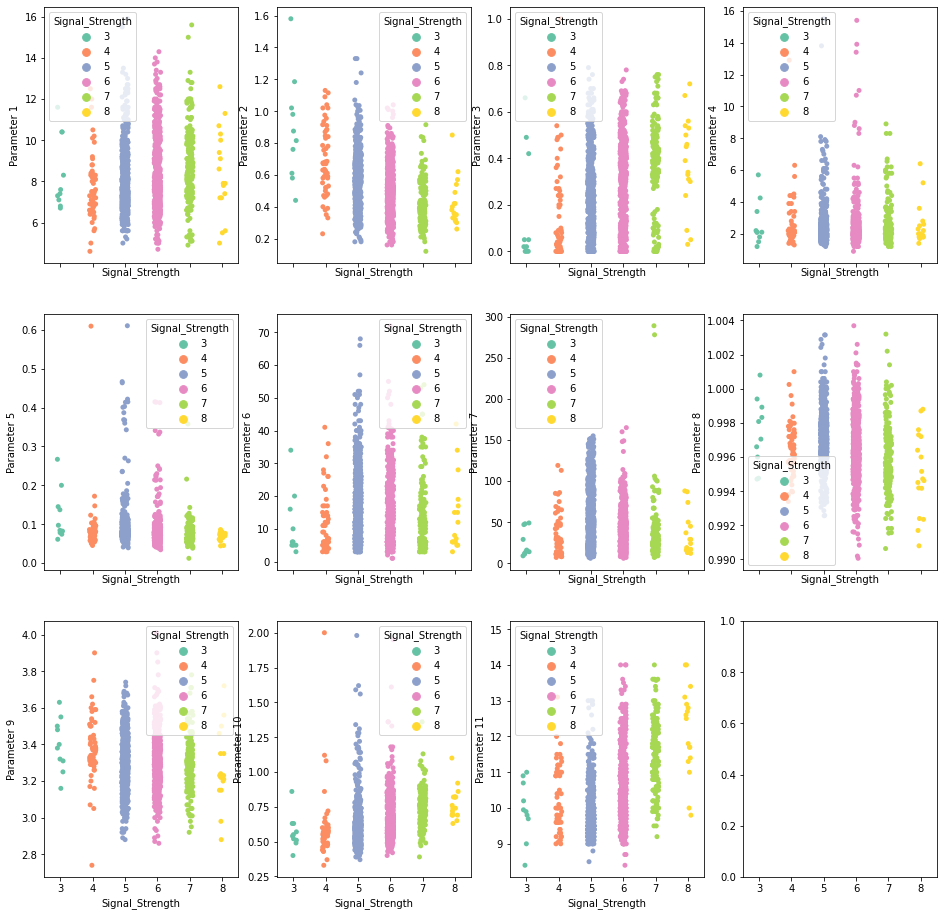

In [14]:
fig, ax = plt.subplots(3,4 , sharex=True, figsize=(16,16))
x=0
y=0

COLS = []

X = np.arange(0,11,1)

for i in X:
    COLS.append(SIGNAL_DATA.columns[i])

for i in COLS:
    sns.stripplot(y = SIGNAL_DATA[i], x = SIGNAL_DATA['Signal_Strength'],ax = ax[x, y],
                    palette="Set2", hue = SIGNAL_DATA['Signal_Strength'])
    y = y+1
    if y == 4:
        x=x+1
        y=0


plt.show()

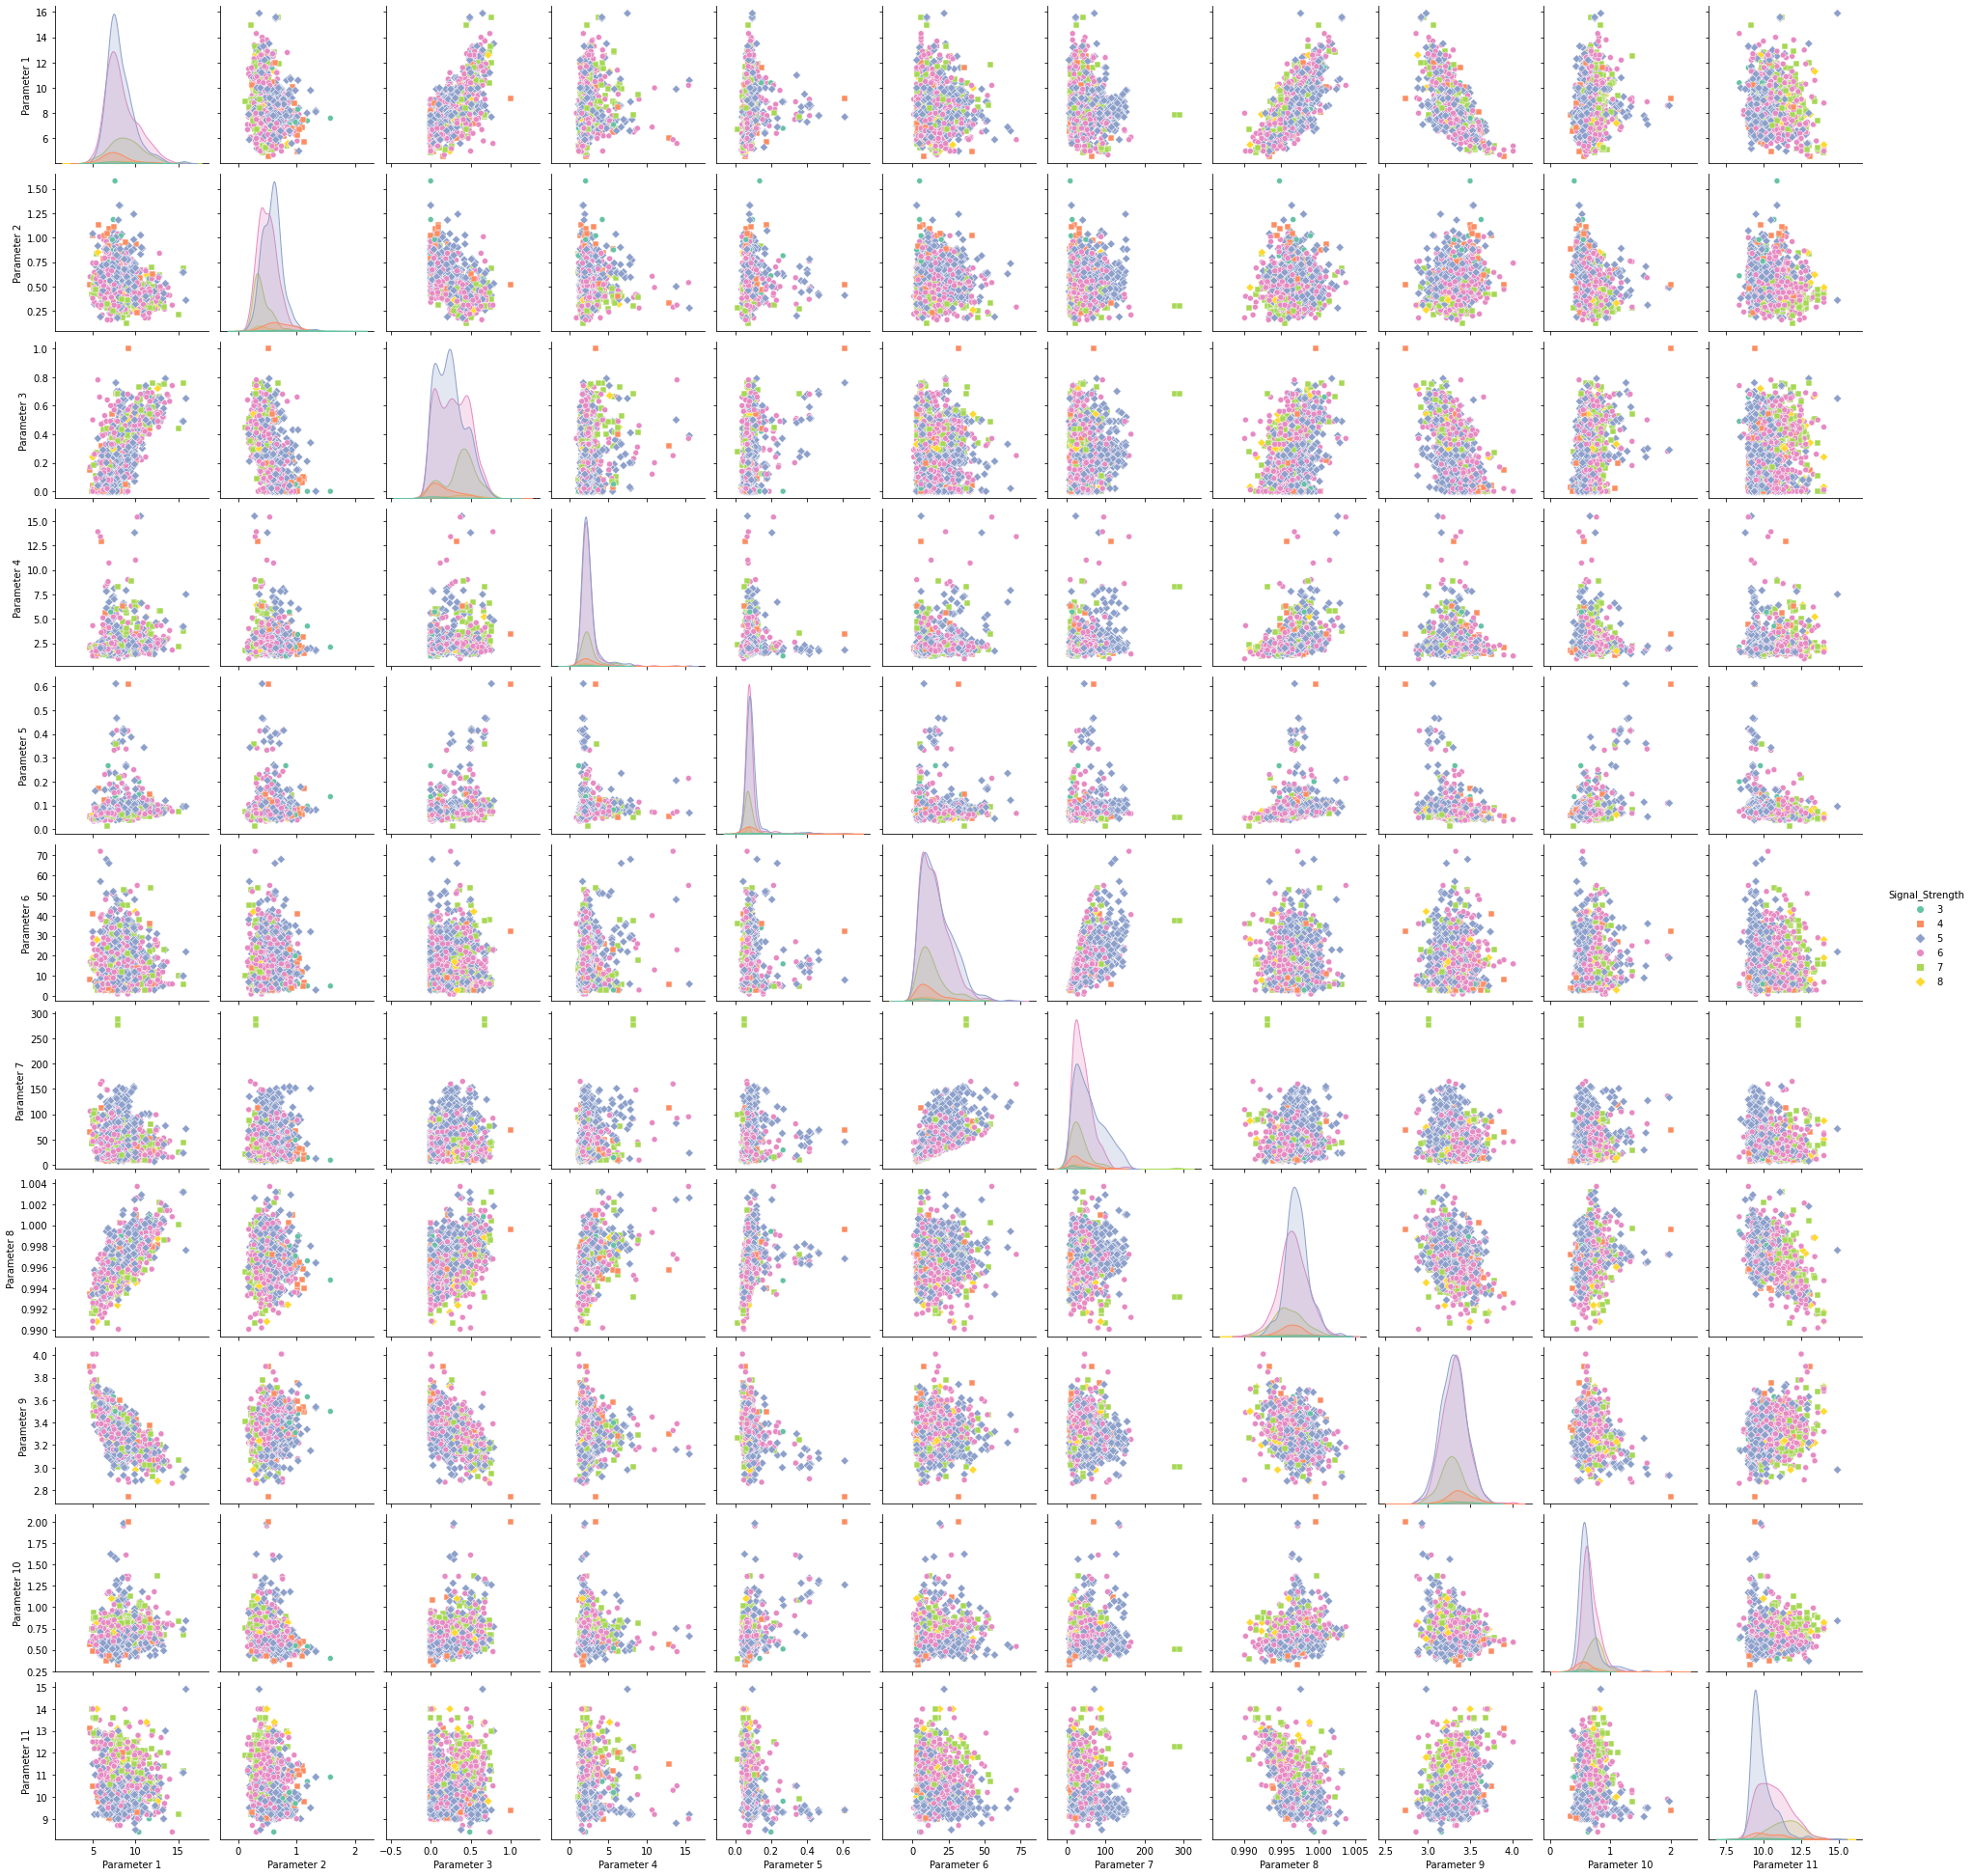

In [16]:
sns.pairplot(SIGNAL_DATA, hue = "Signal_Strength", diag_kind = "kde",kind = "scatter", 
             markers=["o", "s", "D","o", "s", "D"],palette = "Set2")

plt.show()

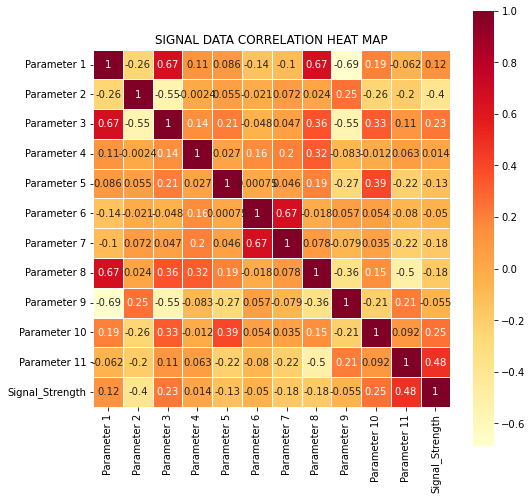

In [17]:
plt.figure(figsize=(8,8))

ax = sns.heatmap(SIGNAL_DATA.corr(method = 'pearson'), annot = True, linewidths = 1, square = True, cmap="YlOrRd")

plt.title("SIGNAL DATA CORRELATION HEAT MAP")

plt. show()

# E. Share insights from the initial data analysis (at least 2).

    * SIGNAL STRENGTH OF THE SIGNALS RANGES BETWEEN 3 - 8
    
    * FOR MOST OF THE SIGNALS STRENGTH IS LYING BETWEEN 5 - 7
    
    * THERE IS NEGATIVE VALUES IN CORRELATION MATRIX INDICATING WEAK CORRELATION
    
    * THERE ARE 240 DUPLICATE ROWS PRESENT WHICH WE HAVE DROPPED FROM THE DATA SET BY KEEPING ONLY FIRST ROW
    
    * THERE ARE PRESENSE OF OUTLIERS IN SOME OF THE SIGNAL PARAMETERS.

# 2. Data preprocessing

# A. Split the data into X & Y.

In [19]:
# DEFINE TWO VARIABLES X AND Y AND ASSIGN INDEPENDENT VARIABLES TO X AND TARGET VARIABLE TO Y

X = SIGNAL_DATA.drop("Signal_Strength", axis=1)

Y = SIGNAL_DATA['Signal_Strength']

In [20]:
X.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [21]:
Y.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# B. Split the data into train & test with 70:30 proportion.

In [22]:
# SPLIT THE DATA INTO TRAINING AND TESTING WITH TRAINING SIZE OF 70% AND TESTING DATA SIZE OF 30%

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=seed)

# C. Print shape of all the 4 variables and verify if train and test data is in sync.

In [24]:
print('SHAPE OF X_TRAIN: ',x_train.shape)

print('\nSHAPE OF X_TEST: ',x_test.shape)

print('\nSHAPE OF Y_TRAIN: ',y_train.shape[0])

print('\nSHAPE OF Y_TEST: ',y_test.shape[0])

SHAPE OF X_TRAIN:  (951, 11)

SHAPE OF X_TEST:  (408, 11)

SHAPE OF Y_TRAIN:  951

SHAPE OF Y_TEST:  408


In [31]:
SIGNAL_DATA['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

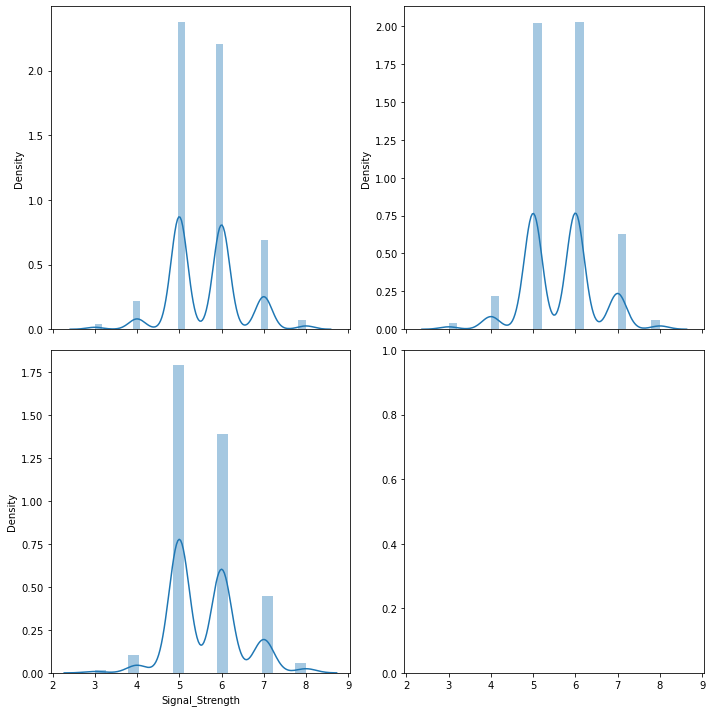

In [25]:
fig, ax = plt.subplots(2,2 , sharex=True, figsize=(10,10))

sns.distplot(Y,ax = ax[0,0])
sns.distplot(y_train,ax = ax[0,1])
sns.distplot(y_test,ax = ax[1,0])

fig.tight_layout()
plt.show()

    * TARGET VARIABLES Y, Y_TRAIN AND Y_TEST SEEMS TO FOLLOW SAME DISTRIBUTION IN THE PLOT

# D. Normalise the train and test data with appropriate method.

In [26]:
X_S = StandardScaler().fit_transform(X)

x_train_s = StandardScaler().fit_transform(x_train)

x_test_s = StandardScaler().fit_transform(x_test)

# E. Transform Labels into format acceptable by Neural Network

In [33]:
y_c = to_categorical(Y)

y_train_c = to_categorical(y_train)

y_test_c = to_categorical(y_test)

y_train_c[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# 3. Model Training & Evaluation using Neural Network

# A. Design a Neural Network to train a classifier.

    * LET US BUILD A SEQUENTIAL MODEL AND TRAIN THE MODEL
    
    * WE WILL ADD INPUT LAYER, HIDDEN LAYER AND OUTPUT LAYER
    
    

In [64]:
NN_MODEL = Sequential()

NN_MODEL.add(Dense(256, kernel_initializer='normal',input_dim = x_train_s.shape[1], activation='relu'))
NN_MODEL.add(tf.keras.layers.BatchNormalization())

NN_MODEL.add(Dense(128, kernel_initializer='normal', activation='relu'))

NN_MODEL.add(Dense(128, kernel_initializer='normal'))
NN_MODEL.add(LeakyReLU(alpha=0.1))

NN_MODEL.add(Dense(9, activation ="softmax"))

NN_MODEL.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# B. Train the classifier using previously designed Architecture

In [65]:
NN_HISTORY = NN_MODEL.fit(x_train_s, y_train_c, validation_data=(x_test_s,y_test_c),epochs=100, batch_size=10)

Epoch 1/100
96/96 [==============================] - 3s 14ms/step - loss: 1.4682 - accuracy: 0.5142 - val_loss: 1.7334 - val_accuracy: 0.5833
Epoch 2/100
96/96 [==============================] - 1s 10ms/step - loss: 1.0710 - accuracy: 0.5762 - val_loss: 1.4708 - val_accuracy: 0.6078
Epoch 3/100
96/96 [==============================] - 1s 9ms/step - loss: 1.0193 - accuracy: 0.5931 - val_loss: 1.2391 - val_accuracy: 0.6029
Epoch 4/100
96/96 [==============================] - 1s 9ms/step - loss: 0.9685 - accuracy: 0.6036 - val_loss: 1.0904 - val_accuracy: 0.5980
Epoch 5/100
96/96 [==============================] - 1s 10ms/step - loss: 0.9478 - accuracy: 0.6025 - val_loss: 1.0060 - val_accuracy: 0.5858
Epoch 6/100
96/96 [==============================] - 1s 9ms/step - loss: 0.9112 - accuracy: 0.6351 - val_loss: 1.0127 - val_accuracy: 0.5686
Epoch 7/100
96/96 [==============================] - 1s 9ms/step - loss: 0.9011 - accuracy: 0.6246 - val_loss: 1.0002 - val_accuracy: 0.5686
Epoch 8/10

In [100]:
HIST_DF = pd.DataFrame.from_dict(NN_HISTORY.history)

print(HIST_DF.sort_values('val_accuracy',ascending = False))

        loss  accuracy  val_loss  val_accuracy
1   1.071029  0.576236  1.470840      0.607843
16  0.787572  0.670873  1.042171      0.605392
2   1.019254  0.593060  1.239072      0.602941
35  0.624774  0.742376  1.183446      0.600490
3   0.968546  0.603575  1.090435      0.598039
..       ...       ...       ...           ...
91  0.340908  0.863302  1.921546      0.507353
59  0.440217  0.829653  1.665873      0.497549
25  0.714044  0.710831  1.250252      0.497549
38  0.612255  0.759201  1.335481      0.482843
39  0.597704  0.759201  1.364223      0.475490

[100 rows x 4 columns]


# C. Plot 2 separate visuals.

# i. Training Loss and Validation Loss
# ii. Training Accuracy and Validation Accuracy

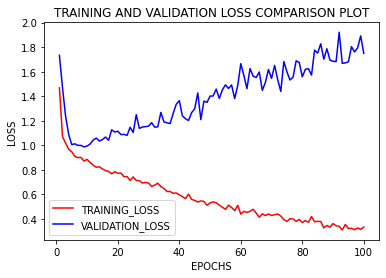

In [69]:
TRAINING_LOSS = HIST_DF['loss']
VALIDATION_LOSS = HIST_DF['val_loss']
EPOCHS = np.arange(1,101)
plt.plot(EPOCHS, TRAINING_LOSS, 'r', label='TRAINING_LOSS')
plt.plot(EPOCHS, VALIDATION_LOSS, 'b', label='VALIDATION_LOSS')
plt.title('TRAINING AND VALIDATION LOSS COMPARISON PLOT')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

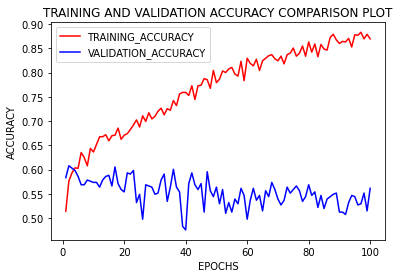

In [70]:
TRAINING_ACC = HIST_DF['accuracy']
VALIDATION_ACC = HIST_DF['val_accuracy']
EPOCHS = np.arange(1,101)
plt.plot(EPOCHS, TRAINING_ACC, 'r', label='TRAINING_ACCURACY')
plt.plot(EPOCHS, VALIDATION_ACC, 'b', label='VALIDATION_ACCURACY')
plt.title('TRAINING AND VALIDATION ACCURACY COMPARISON PLOT')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

# D. Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [109]:
# TRY INCREASING THE EPOCHS COUNT AND CHECK THE PERFORMANCE.

RESULTS = pd.DataFrame()

for i in np.arange(200,501,100):
    EPOCH_HIST = NN_MODEL.fit(x_train_s, y_train_c, validation_data=(x_test_s,y_test_c),epochs=i, batch_size=10).history
    y_pred = NN_MODEL.predict(x_test_s)
    SCORE = metrics.r2_score(y_test_c,y_pred)
    MAX_ACC = np.max(EPOCH_HIST['accuracy'])
    MAX_VAL_ACC = np.max(EPOCH_HIST['val_accuracy'])
    RESULTS = RESULTS.append(pd.Series([i,SCORE,MAX_ACC,MAX_VAL_ACC]),ignore_index=True)
        
RESULTS.columns = ['NO OF EPOCHS','MODEL SCORE','TRAINING ACCURACY','TESTING ACCURACY']

Epoch 1/200
96/96 [==============================] - 1s 6ms/step - loss: 1.2247 - accuracy: 0.4164 - val_loss: 1.1652 - val_accuracy: 0.4706
Epoch 2/200
96/96 [==============================] - 0s 5ms/step - loss: 1.2239 - accuracy: 0.4269 - val_loss: 1.1872 - val_accuracy: 0.3652
Epoch 3/200
96/96 [==============================] - 1s 6ms/step - loss: 1.2250 - accuracy: 0.4185 - val_loss: 1.1666 - val_accuracy: 0.4706
Epoch 4/200
96/96 [==============================] - 1s 6ms/step - loss: 1.2262 - accuracy: 0.4069 - val_loss: 1.1666 - val_accuracy: 0.4706
Epoch 5/200
96/96 [==============================] - 1s 5ms/step - loss: 1.2253 - accuracy: 0.4196 - val_loss: 1.1827 - val_accuracy: 0.3652
Epoch 6/200
96/96 [==============================] - 1s 6ms/step - loss: 1.2257 - accuracy: 0.4101 - val_loss: 1.1869 - val_accuracy: 0.3652
Epoch 7/200
96/96 [==============================] - 1s 6ms/step - loss: 1.2262 - accuracy: 0.3912 - val_loss: 1.1792 - val_accuracy: 0.3652
Epoch 8/200
9

In [111]:
print(RESULTS)

   NO OF EPOCHS  MODEL SCORE  TRAINING ACCURACY  TESTING ACCURACY
0         200.0    -0.010861           0.434280          0.470588
1         300.0    -0.007187           0.432177          0.470588
2         400.0    -0.002008           0.436383          0.470588
3         500.0    -0.010811           0.439537          0.470588


In [112]:
# TRY THE DESIGN WITH VARIOUS OPTIMIZERS AND COMPILE

OPT = ['Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']

RESULTS = pd.DataFrame()

for i in OPT:
    NN_MODEL.compile(loss='categorical_crossentropy', optimizer=i, metrics=['accuracy'])
    LR_HIST = NN_MODEL.fit(x_train_s, y_train_c, validation_data=(x_test_s,y_test_c),epochs=100, batch_size=10).history
    y_pred = NN_MODEL.predict(x_test_s)
    SCORE = metrics.r2_score(y_test_c,y_pred)
    MAX_ACC = np.max(LR_HIST['accuracy'])
    MAX_VAL_ACC = np.max(LR_HIST['val_accuracy'])
    RESULTS = RESULTS.append(pd.Series([i,SCORE,MAX_ACC,MAX_VAL_ACC]),ignore_index=True)
        
RESULTS.columns = ['NO OF EPOCHS','MODEL SCORE','TRAINING ACCURACY','TESTING ACCURACY']

Epoch 1/100
96/96 [==============================] - 2s 9ms/step - loss: 1.2258 - accuracy: 0.4059 - val_loss: 1.1782 - val_accuracy: 0.3652
Epoch 2/100
96/96 [==============================] - 1s 5ms/step - loss: 1.2234 - accuracy: 0.3901 - val_loss: 1.1752 - val_accuracy: 0.3652
Epoch 3/100
96/96 [==============================] - 1s 6ms/step - loss: 1.2229 - accuracy: 0.4059 - val_loss: 1.1735 - val_accuracy: 0.3652
Epoch 4/100
96/96 [==============================] - 1s 6ms/step - loss: 1.2229 - accuracy: 0.4069 - val_loss: 1.1764 - val_accuracy: 0.3652
Epoch 5/100
96/96 [==============================] - 1s 6ms/step - loss: 1.2230 - accuracy: 0.4059 - val_loss: 1.1749 - val_accuracy: 0.3652
Epoch 6/100
96/96 [==============================] - 1s 6ms/step - loss: 1.2230 - accuracy: 0.4059 - val_loss: 1.1750 - val_accuracy: 0.3652
Epoch 7/100
96/96 [==============================] - 1s 6ms/step - loss: 1.2232 - accuracy: 0.4027 - val_loss: 1.1745 - val_accuracy: 0.3652
Epoch 8/100
9

In [113]:
print(RESULTS)

  NO OF EPOCHS  MODEL SCORE  TRAINING ACCURACY  TESTING ACCURACY
0         Adam    -0.004342           0.407992          0.470588
1      RMSprop    -0.004092           0.409043          0.470588
2     Adadelta    -0.004088           0.405889          0.365196
3      Adagrad    -0.004072           0.405889          0.365196
4       Adamax    -0.004241           0.414301          0.470588
5        Nadam    -0.004594           0.405889          0.470588
6         Ftrl    -0.323946           0.405889          0.470588


    * APART FROM SGD OPTIMIZER, WE ARE NOT GETTING GOOD RESULTS AFROM OTHER OPTIMIZER FUNCTIONS.
    
    * WE WILL STICK WITH THE SGD OPTIMIZER FOR THE DESIGN.

In [76]:
# TRY WITH SGD OPTIMIZER AND USE DIFFERENT LEARNING RATES TO TRAIN AND TEST THE MODEL.

RESULTS = pd.DataFrame()

LR = np.arange(0.01,0.11,0.01)

for i in LR:
    sgd = SGD(lr=i)
    NN_MODEL.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    NN_MODEL.fit(x_train_s, y_train_c, validation_data=(x_test_s,y_test_c),epochs=100, batch_size=10)
    y_pred = NN_MODEL.predict(x_test_s)
    SCORE = metrics.r2_score(y_test_c,y_pred)
    RESULTS = RESULTS.append(pd.Series([i, SCORE]),ignore_index=True)
    
RESULTS.columns = ['LEARNING RATE', 'MODEL SCORE']
    

Epoch 1/100
96/96 [==============================] - 2s 13ms/step - loss: 1.4754 - accuracy: 0.3985 - val_loss: 1.3608 - val_accuracy: 0.3652
Epoch 2/100
96/96 [==============================] - 1s 5ms/step - loss: 1.3611 - accuracy: 0.3901 - val_loss: 1.2829 - val_accuracy: 0.3652
Epoch 3/100
96/96 [==============================] - 1s 6ms/step - loss: 1.3149 - accuracy: 0.4006 - val_loss: 1.2490 - val_accuracy: 0.3652
Epoch 4/100
96/96 [==============================] - 1s 6ms/step - loss: 1.2931 - accuracy: 0.3796 - val_loss: 1.2293 - val_accuracy: 0.4706
Epoch 5/100
96/96 [==============================] - 1s 5ms/step - loss: 1.2796 - accuracy: 0.4080 - val_loss: 1.2187 - val_accuracy: 0.3652
Epoch 6/100
96/96 [==============================] - 1s 6ms/step - loss: 1.2709 - accuracy: 0.3807 - val_loss: 1.2113 - val_accuracy: 0.3652
Epoch 7/100
96/96 [==============================] - 1s 6ms/step - loss: 1.2638 - accuracy: 0.4027 - val_loss: 1.2078 - val_accuracy: 0.3652
Epoch 8/100


In [77]:
print(RESULTS)

   LEARNING RATE  MODEL SCORE
0           0.01    -0.002490
1           0.02    -0.002477
2           0.03    -0.002248
3           0.04    -0.003932
4           0.05    -0.001524
5           0.06    -0.005578
6           0.07    -0.004509
7           0.08    -0.001374
8           0.09    -0.005196
9           0.10    -0.009711


    * MODEL SCORE IS NOT IMPROVED WITH THE DIFFERENT LEARNING RATES.

In [85]:
# USE SIGMOID FUNCTION INSTEAD OF RELU AND COMPARE THE RESULTS

NN_MODEL_1 = Sequential()

NN_MODEL_1.add(Dense(256, kernel_initializer='normal',input_dim = x_train_s.shape[1], activation='sigmoid'))
NN_MODEL_1.add(tf.keras.layers.BatchNormalization())

NN_MODEL_1.add(Dense(128, kernel_initializer='normal', activation='sigmoid'))

NN_MODEL_1.add(Dense(128, kernel_initializer='normal'))
NN_MODEL_1.add(LeakyReLU(alpha=0.1))

NN_MODEL_1.add(Dense(9, activation ="softmax"))

NN_MODEL_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

HISTORY_SIGMOID = NN_MODEL_1.fit(x_train_s, y_train_c, validation_data=(x_test_s,y_test_c),epochs=100, batch_size=10)

Epoch 1/100
96/96 [==============================] - 2s 8ms/step - loss: 1.3927 - accuracy: 0.4017 - val_loss: 1.2364 - val_accuracy: 0.3652
Epoch 2/100
96/96 [==============================] - 1s 5ms/step - loss: 1.1889 - accuracy: 0.5079 - val_loss: 1.1702 - val_accuracy: 0.4706
Epoch 3/100
96/96 [==============================] - 0s 5ms/step - loss: 1.1211 - accuracy: 0.5373 - val_loss: 1.2393 - val_accuracy: 0.3652
Epoch 4/100
96/96 [==============================] - 1s 5ms/step - loss: 1.0806 - accuracy: 0.5394 - val_loss: 1.1174 - val_accuracy: 0.4755
Epoch 5/100
96/96 [==============================] - 0s 5ms/step - loss: 1.0587 - accuracy: 0.5605 - val_loss: 1.0298 - val_accuracy: 0.5392
Epoch 6/100
96/96 [==============================] - 1s 6ms/step - loss: 1.0599 - accuracy: 0.5573 - val_loss: 1.0226 - val_accuracy: 0.5319
Epoch 7/100
96/96 [==============================] - 1s 6ms/step - loss: 1.0467 - accuracy: 0.5468 - val_loss: 0.9840 - val_accuracy: 0.6005
Epoch 8/100
9

In [86]:
HIST_SIGDF = pd.DataFrame.from_dict(HISTORY_SIGMOID.history)

y_pred = NN_MODEL_1.predict(x_test_s)

print('SCORE:',metrics.r2_score(y_test_c,y_pred))

print('\n\n',HIST_SIGDF.sort_values('val_accuracy',ascending = False).head())

13/13 [==============================] - 0s 3ms/step
SCORE: 0.07041858026786495


         loss  accuracy  val_loss  val_accuracy
8   1.026517  0.578339  0.951217      0.612745
19  0.993754  0.569926  0.958910      0.610294
9   1.007084  0.585699  0.947364      0.610294
12  1.012399  0.560463  0.954428      0.607843
91  0.918346  0.598318  0.950822      0.602941


In [81]:
# USE TANH FUNCTION INSTEAD OF RELU AND COMPARE THE RESULTS

NN_MODEL_2 = Sequential()

NN_MODEL_2.add(Dense(256, kernel_initializer='normal',input_dim = x_train_s.shape[1], activation='tanh'))
NN_MODEL_2.add(tf.keras.layers.BatchNormalization())

NN_MODEL_2.add(Dense(128, kernel_initializer='normal', activation='tanh'))

NN_MODEL_2.add(Dense(128, kernel_initializer='normal'))
NN_MODEL_2.add(LeakyReLU(alpha=0.1))

NN_MODEL_2.add(Dense(9, activation ="softmax"))

NN_MODEL_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

HISTORY_TANH = NN_MODEL_2.fit(x_train_s, y_train_c, validation_data=(x_test_s,y_test_c),epochs=100, batch_size=10)

Epoch 1/100
96/96 [==============================] - 3s 9ms/step - loss: 1.3597 - accuracy: 0.4921 - val_loss: 1.6315 - val_accuracy: 0.6054
Epoch 2/100
96/96 [==============================] - 1s 6ms/step - loss: 1.1017 - accuracy: 0.5626 - val_loss: 1.2690 - val_accuracy: 0.5956
Epoch 3/100
96/96 [==============================] - 1s 6ms/step - loss: 1.0347 - accuracy: 0.5804 - val_loss: 1.0877 - val_accuracy: 0.5613
Epoch 4/100
96/96 [==============================] - 1s 6ms/step - loss: 1.0121 - accuracy: 0.5910 - val_loss: 1.0393 - val_accuracy: 0.5662
Epoch 5/100
96/96 [==============================] - 1s 6ms/step - loss: 0.9867 - accuracy: 0.5825 - val_loss: 1.0092 - val_accuracy: 0.5931
Epoch 6/100
96/96 [==============================] - 1s 6ms/step - loss: 0.9982 - accuracy: 0.5741 - val_loss: 0.9767 - val_accuracy: 0.5858
Epoch 7/100
96/96 [==============================] - 1s 6ms/step - loss: 0.9579 - accuracy: 0.5941 - val_loss: 0.9736 - val_accuracy: 0.6152
Epoch 8/100
9

In [83]:
HIST_TANDF = pd.DataFrame.from_dict(HISTORY_TANH.history)

y_pred = NN_MODEL_2.predict(x_test_s)

print('SCORE:',metrics.r2_score(y_test_c,y_pred))

print('\n\n',HIST_TANDF.sort_values('val_accuracy',ascending = False).head())

13/13 [==============================] - 0s 3ms/step
SCORE: -0.06490347271279912


         loss  accuracy  val_loss  val_accuracy
6   0.957873  0.594111  0.973629      0.615196
9   0.919990  0.617245  0.966579      0.615196
29  0.832676  0.647739  1.017645      0.610294
37  0.817218  0.635121  0.988155      0.610294
69  0.735600  0.702419  1.083075      0.605392


In [91]:
# ADDING MORE HIDDEN LAYERS TO THE DESIGN AND TEST AND TRAIN THE MODEL

NN_MODEL_3 = Sequential()

NN_MODEL_3.add(Dense(256, kernel_initializer='normal',input_dim = x_train_s.shape[1], activation='relu'))
NN_MODEL_3.add(tf.keras.layers.BatchNormalization())

NN_MODEL_3.add(Dense(128, kernel_initializer='normal', activation='relu'))

NN_MODEL_3.add(Dense(128, kernel_initializer='normal', activation='relu')) #ADDED HIDDEN LAYER

NN_MODEL_3.add(Dense(128, kernel_initializer='normal', activation='relu')) #ADDED HIDDEN LAYER

NN_MODEL_3.add(Dense(128, kernel_initializer='normal'))
NN_MODEL_3.add(LeakyReLU(alpha=0.1))

NN_MODEL_3.add(Dense(9, activation ="softmax"))

NN_MODEL_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

HISTORY_ADDNL = NN_MODEL_3.fit(x_train_s, y_train_c, validation_data=(x_test_s,y_test_c),epochs=100, batch_size=10)

Epoch 1/100
96/96 [==============================] - 2s 9ms/step - loss: 1.9506 - accuracy: 0.3891 - val_loss: 1.8068 - val_accuracy: 0.3652
Epoch 2/100
96/96 [==============================] - 1s 8ms/step - loss: 1.4253 - accuracy: 0.4869 - val_loss: 1.4698 - val_accuracy: 0.3775
Epoch 3/100
96/96 [==============================] - 1s 6ms/step - loss: 1.2206 - accuracy: 0.5457 - val_loss: 1.2842 - val_accuracy: 0.5564
Epoch 4/100
96/96 [==============================] - 1s 6ms/step - loss: 1.1419 - accuracy: 0.5521 - val_loss: 1.1501 - val_accuracy: 0.5784
Epoch 5/100
96/96 [==============================] - 1s 6ms/step - loss: 1.0745 - accuracy: 0.5731 - val_loss: 1.0323 - val_accuracy: 0.5956
Epoch 6/100
96/96 [==============================] - 1s 5ms/step - loss: 1.0308 - accuracy: 0.5678 - val_loss: 0.9955 - val_accuracy: 0.5931
Epoch 7/100
96/96 [==============================] - 1s 6ms/step - loss: 1.0161 - accuracy: 0.5815 - val_loss: 0.9745 - val_accuracy: 0.5980
Epoch 8/100
9

In [98]:
HIST_ADDNLDF = pd.DataFrame.from_dict(HISTORY_ADDNL.history)

y_pred = NN_MODEL_3.predict(x_test_s)

print('SCORE:',metrics.r2_score(y_test_c,y_pred))

print('\n\n',HIST_ADDNLDF.sort_values('val_accuracy',ascending = False).head())

13/13 [==============================] - 0s 7ms/step
SCORE: -0.0843767302916723


         loss  accuracy  val_loss  val_accuracy
39  0.696929  0.733964  1.116447      0.615196
23  0.812213  0.666667  1.049551      0.615196
19  0.870091  0.649842  0.996443      0.612745
22  0.830993  0.650894  1.033574      0.610294
34  0.719130  0.711882  1.125233      0.610294


In [94]:
# REMOVE HIDDEN LAYERS TO THE DESIGN AND TEST AND TRAIN THE MODEL

NN_MODEL_4 = Sequential()

NN_MODEL_4.add(Dense(256, kernel_initializer='normal',input_dim = x_train_s.shape[1], activation='relu'))
NN_MODEL_4.add(tf.keras.layers.BatchNormalization())

# NO HIDDEN LAYERS ADDED

NN_MODEL_4.add(Dense(9, activation ="softmax"))

NN_MODEL_4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

HISTORY_NONL = NN_MODEL_4.fit(x_train_s, y_train_c, validation_data=(x_test_s,y_test_c),epochs=100, batch_size=10)

Epoch 1/100
96/96 [==============================] - 2s 8ms/step - loss: 1.8850 - accuracy: 0.4364 - val_loss: 1.6985 - val_accuracy: 0.5466
Epoch 2/100
96/96 [==============================] - 0s 5ms/step - loss: 1.3641 - accuracy: 0.5720 - val_loss: 1.3972 - val_accuracy: 0.5270
Epoch 3/100
96/96 [==============================] - 0s 5ms/step - loss: 1.1980 - accuracy: 0.5868 - val_loss: 1.2745 - val_accuracy: 0.5098
Epoch 4/100
96/96 [==============================] - 0s 4ms/step - loss: 1.0817 - accuracy: 0.5983 - val_loss: 1.1485 - val_accuracy: 0.5637
Epoch 5/100
96/96 [==============================] - 0s 4ms/step - loss: 0.9941 - accuracy: 0.6204 - val_loss: 1.1583 - val_accuracy: 0.5760
Epoch 6/100
96/96 [==============================] - 0s 5ms/step - loss: 0.9569 - accuracy: 0.6341 - val_loss: 1.1569 - val_accuracy: 0.5686
Epoch 7/100
96/96 [==============================] - 0s 5ms/step - loss: 0.9072 - accuracy: 0.6425 - val_loss: 1.1564 - val_accuracy: 0.5539
Epoch 8/100
9

In [99]:
HIST_NONLDF = pd.DataFrame.from_dict(HISTORY_NONL.history)

y_pred = NN_MODEL_4.predict(x_test_s)

print('SCORE:',metrics.r2_score(y_test_c,y_pred))

print('\n\n',HIST_NONLDF.sort_values('val_accuracy',ascending = False).head())

13/13 [==============================] - 0s 6ms/step
SCORE: -0.17272356089962346


         loss  accuracy  val_loss  val_accuracy
9   0.830406  0.668770  1.109689      0.585784
73  0.499462  0.791798  1.294200      0.580882
30  0.657135  0.731861  1.182817      0.580882
17  0.745816  0.686646  1.086183      0.578431
4   0.994086  0.620400  1.158261      0.575980


    * BY ADDING ADDITIONAL LAYERS TO THE MODEL, ACCURACY FOR BOTH TRAINING AND TESTING DATA IS GOOD.
    
    * ALSO THE LOSS ON TRAINING AND TESTING DATA REDUCED BY ADDING ADDITIONAL LAYERS.
    
    * BY ADDING MORE LAYERS WE CAN EXPECT ACCURACY CAN BE INCREASED AND LOSS CAN BE REDUCED.

In [101]:
# ADDING MORE HIDDEN LAYERS TO THE DESIGN AND TEST AND TRAIN THE MODEL

NN_MODEL_5 = Sequential()

NN_MODEL_5.add(Dense(256, kernel_initializer='normal',input_dim = x_train_s.shape[1], activation='relu'))
NN_MODEL_5.add(tf.keras.layers.BatchNormalization())

NN_MODEL_5.add(Dense(128, kernel_initializer='normal', activation='relu'))

NN_MODEL_5.add(Dense(128, kernel_initializer='normal', activation='relu')) #ADDED HIDDEN LAYER

NN_MODEL_5.add(Dense(128, kernel_initializer='normal', activation='relu')) #ADDED HIDDEN LAYER

NN_MODEL_5.add(Dense(128, kernel_initializer='normal')) #ADDED HIDDEN LAYER
NN_MODEL_5.add(LeakyReLU(alpha=0.1))

NN_MODEL_5.add(Dense(128, kernel_initializer='normal')) #ADDED HIDDEN LAYER
NN_MODEL_5.add(LeakyReLU(alpha=0.1))

NN_MODEL_5.add(Dense(128, kernel_initializer='normal'))
NN_MODEL_5.add(LeakyReLU(alpha=0.1))

NN_MODEL_5.add(Dense(9, activation ="softmax"))

NN_MODEL_5.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

HISTORY_ADDNL = NN_MODEL_5.fit(x_train_s, y_train_c, validation_data=(x_test_s,y_test_c),epochs=100, batch_size=10)

Epoch 1/100
96/96 [==============================] - 5s 27ms/step - loss: 2.0138 - accuracy: 0.4006 - val_loss: 1.8267 - val_accuracy: 0.3652
Epoch 2/100
96/96 [==============================] - 2s 17ms/step - loss: 1.6859 - accuracy: 0.4090 - val_loss: 1.5406 - val_accuracy: 0.3652
Epoch 3/100
96/96 [==============================] - 1s 12ms/step - loss: 1.4602 - accuracy: 0.4059 - val_loss: 1.3570 - val_accuracy: 0.3652
Epoch 4/100
96/96 [==============================] - 1s 13ms/step - loss: 1.3393 - accuracy: 0.4069 - val_loss: 1.2675 - val_accuracy: 0.3652
Epoch 5/100
96/96 [==============================] - 1s 13ms/step - loss: 1.2902 - accuracy: 0.4164 - val_loss: 1.2227 - val_accuracy: 0.4975
Epoch 6/100
96/96 [==============================] - 1s 11ms/step - loss: 1.2636 - accuracy: 0.4501 - val_loss: 1.1996 - val_accuracy: 0.5564
Epoch 7/100
96/96 [==============================] - 1s 11ms/step - loss: 1.2454 - accuracy: 0.4606 - val_loss: 1.1977 - val_accuracy: 0.3652
Epoch 

In [104]:
HIST_ADDNLDF = pd.DataFrame.from_dict(HISTORY_ADDNL.history)

y_pred = NN_MODEL_5.predict(x_test_s)

print('SCORE:',metrics.r2_score(y_test_c,y_pred))

print('\n\n',HIST_ADDNLDF.sort_values('val_accuracy',ascending = False).head())

13/13 [==============================] - 0s 3ms/step
SCORE: -0.042240137240989434


         loss  accuracy  val_loss  val_accuracy
32  0.881614  0.663512  1.011114      0.625000
54  0.727024  0.707676  1.171290      0.612745
77  0.592574  0.764458  1.313602      0.612745
23  0.924132  0.628812  1.022164      0.612745
45  0.786466  0.694006  1.165810      0.607843


    * BY INCREASING THE EPOCHS, WE DONT SEE ANY ACTUAL INCREASE IN THE TRAINING OR TEST ACCURACY.
    
    * BY INCREASING THE HIDDEN LAYERS, MODEL IS BECOMING MORE STABLE. 
    
    * AT TRAINING DATA ACCURACY OF 76.4% WE CAN SEE TEST DATA ACCURACY IS 61.27%
    
    * BY ADDING MORE AND MORE LAYERS, WE CAN STILL INCREASE THE MODEL PERFORMANCE BUT MAY BECOME OVERFIT.
    
    * WE WILL CONSIDER NN_MODEL5 AS THE UPDATED AND FINAL MODEL.

# E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

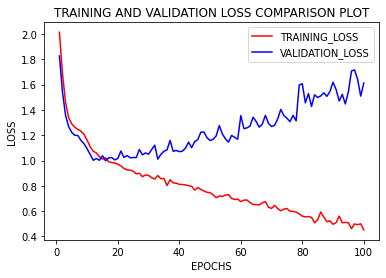

In [105]:
TRAINING_LOSS = HIST_ADDNLDF['loss']
VALIDATION_LOSS = HIST_ADDNLDF['val_loss']
EPOCHS = np.arange(1,101)
plt.plot(EPOCHS, TRAINING_LOSS, 'r', label='TRAINING_LOSS')
plt.plot(EPOCHS, VALIDATION_LOSS, 'b', label='VALIDATION_LOSS')
plt.title('TRAINING AND VALIDATION LOSS COMPARISON PLOT')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

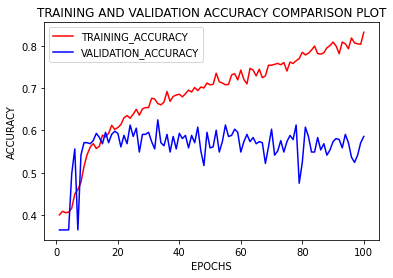

In [106]:
TRAINING_ACC = HIST_ADDNLDF['accuracy']
VALIDATION_ACC = HIST_ADDNLDF['val_accuracy']
EPOCHS = np.arange(1,101)
plt.plot(EPOCHS, TRAINING_ACC, 'r', label='TRAINING_ACCURACY')
plt.plot(EPOCHS, VALIDATION_ACC, 'b', label='VALIDATION_ACCURACY')
plt.title('TRAINING AND VALIDATION ACCURACY COMPARISON PLOT')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

    * INSIGHTS:
    
        * INCREASING THE NUMBER OF EPOCHS DID NOT IMPROVED THE PERFORMANCE.
        
        * VARIOUS OPTIMIZERS AND LEARNING RATES NEITHER IMPROVED THE PERFORMANCE.
        
        * SIGMOID NAD TANH ACTIVATION FUNCTIONS IMPROVED THE PERFORMANCE SLIGHTLY
        
        * AS THE HIDDEN LAYERS ARE INCREASED, WE CAN SEE THAT MODEL IS BECOMING STABLE.
        
        * TRAINING DATA GRAPH IS SHOWN BECOMING MORE AND MORE CLEAR CURVE.
        
        * LOSS IN TRAINING DATA IS DECREASED COMPARED TO OLD MODEL AND TRAINIG DATA ACCURACY IS SLIGHTLY INCREASED.
        
        * WE CAN ADD MORE LAYERS TO THE DESIGN AND INCREASE THE MODEL PERFORMANCE.

# • DOMAIN: Autonomous Vehicles

# • CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.
# The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.
# While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.
# The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.


# • DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
# Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
# The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
# Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
# Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF http://ufldl.stanford.edu/housenumbers as the URL for this site.

# • PROJECT OBJECTIVE: To build a digit classifier on the SVHN (Street View Housing Number) dataset.

# Steps and tasks:

# 1. Data Import and Exploration

# A. Read the .h5 file and assign to a variable.

In [114]:
import h5py

SVHN_DATA = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5','r')

# B. Print all the keys from the .h5 file.

In [115]:
print('ALL THE KEYS PRESENT IN THE LOADED H5 FILE: \n',SVHN_DATA.keys())

ALL THE KEYS PRESENT IN THE LOADED H5 FILE: 
 <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


# C. Split the data into X_train, X_test, Y_train, Y_test

In [116]:
X_TRAIN = SVHN_DATA['X_train'][:]
Y_TRAIN = SVHN_DATA['y_train'][:]
X_VAL = SVHN_DATA['X_val'][:]
Y_VAL = SVHN_DATA['y_val'][:]
X_TEST = SVHN_DATA['X_test'][:]
Y_TEST = SVHN_DATA['y_test'][:]

In [117]:
X_TRAIN[:5]

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]],

       [[ 86.9591,  87.0685,  88.3735, ...,  91.8014,  89.7477,
          92.5302],
        [ 86.688 ,  86.9114,  87.4337, ...,  90.7306,  87.204 ,
          88.5629],
        [ 85.9654,  85.8145,  85.9239, ...,  63.8626,  59.8199,
          54.8805],
        ...,
        [ 90.2236,  91.0448,  93.4637, ...,  55.3535,  48.5822,
          44.0557],
        [ 90.6427,  90.4039,  90.937 , ...,  78.2696,  77.4977,
          74.27  ],
        [ 88.0236,  88.1977,  86.6709, ...,  75.

# 2. Data Visualisation and preprocessing

# A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [118]:
print('SHAPE OF X_TRAIN: ',X_TRAIN.shape)

print('\nSHAPE OF X_TEST: ',X_TEST.shape)

print('\nSHAPE OF X_VAL: ',X_VAL.shape)

print('\nSHAPE OF Y_TRAIN: ',Y_TRAIN.shape)

print('\nSHAPE OF Y_TEST: ',Y_TEST.shape)

print('\nSHAPE OF Y_VAL: ',Y_VAL.shape)

SHAPE OF X_TRAIN:  (42000, 32, 32)

SHAPE OF X_TEST:  (18000, 32, 32)

SHAPE OF X_VAL:  (60000, 32, 32)

SHAPE OF Y_TRAIN:  (42000,)

SHAPE OF Y_TEST:  (18000,)

SHAPE OF Y_VAL:  (60000,)


    * X_TRAIN CONTAINS 42000 RECORDS WHERE AS TARGET Y_TRAIN HAS 42000 ELEMENTS
    
    * X_TEST CONTAINS 18000 RECORDS WHERE AS Y_TEST CONTAINS 18000 ELEMENTS.
    
    * SINCE THERE SAME NUMBER OF PREDICTORS AS TARGET VARIABLES WE CAN SAY THAT THE DATA IS IN SYNC

# B. Visualise first 10 images in train data and print its corresponding labels.

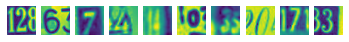

Label:  [2 6 7 4 4 0 3 0 7 3]


In [119]:
for i in range(0,10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_TRAIN[i])
    plt.axis('off')
        
plt.show()
print('Label: ', Y_TRAIN[:10])

    * WE HAVE DISPLAYED THE FIRST 10 IMAGES FROM THE X_TRAIN AND CORRESPONDING Y_LABLES

# C. Reshape all the images with appropriate shape update the data in same variable.

    * SHAPE OF THE TRAINING IMAGES IS IN 3 DIMENSIONAL.
    
    * WE WILL CHANGE THE IMAGES DATA FROM 3 DIMENSIONAL TO 2 DIMENSIONAL.

In [120]:
X_TRAIN = np.asarray(X_TRAIN).reshape(42000,1024)
X_TEST = np.asarray(X_TEST).reshape(18000,1024)
X_VAL = np.asarray(X_VAL).reshape(60000,1024)

In [121]:
print('SHAPE OF X_TRAIN: ',X_TRAIN.shape)

print('\nSHAPE OF X_TEST: ',X_TEST.shape)

print('\nSHAPE OF X_VAL: ',X_VAL.shape)

SHAPE OF X_TRAIN:  (42000, 1024)

SHAPE OF X_TEST:  (18000, 1024)

SHAPE OF X_VAL:  (60000, 1024)


    * WE HAVE CHANGED THE DIMNESIONS TO 2 DIMENSIONAL AS BELOW:
    
    (60000,32,32) --- (60000,1024)
    (42000,32,32) --- (42000,1024)
    (18000,32,32) --- (18000,1024)

# D. Normalise the images i.e. Normalise the pixel values.

    * IN ORDER TO NORMALIZE THE PIXEL VALUES, WE WILL DIVIDE THEM BY 255 WHICH IS THE MAX RGB VALUE
    
    * CONVERT THE NORMALIZED PIXEL VALUES INTO FLOATING DATA TYPE

In [122]:
X_TRAIN /= 255
X_VAL /= 255
X_TEST /= 255

X_TRAIN = X_TRAIN.astype('float32')
X_VAL = X_VAL.astype('float32')
X_TEST = X_TEST.astype('float32')

In [123]:
X_TRAIN[:5]

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
        0.20799099],
       [0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
        0.31092745],
       [0.48284313, 0.49356118, 0.47872823, ..., 0.36837214, 0.41093138,
        0.44637334],
       [0.5789004 , 0.547531  , 0.5592945 , ..., 0.6161545 , 0.6163902 ,
        0.6163902 ],
       [0.60387844, 0.6085423 , 0.61736315, ..., 0.17918824, 0.19065568,
        0.22803685]], dtype=float32)

# E. Transform Labels into format acceptable by Neural Network

    * WE CHANGE THE FORMAT OF THE EACH LABEL INTO ARRAY FORMAT WHERE THE SIZE IS THE TOTAL UNIQUE ELEMENTS.
   

In [124]:
print('UNIQUE VALUES IN TRAINING DATA:',np.unique(Y_TRAIN))

print('\nUNIQUE VALUES IN TESTING DATA:',np.unique(Y_TEST))

print('\nUNIQUE VALUES IN VALIDATION DATA:',np.unique(Y_VAL))

UNIQUE VALUES IN TRAINING DATA: [0 1 2 3 4 5 6 7 8 9]

UNIQUE VALUES IN TESTING DATA: [0 1 2 3 4 5 6 7 8 9]

UNIQUE VALUES IN VALIDATION DATA: [0 1 2 3 4 5 6 7 8 9]


In [125]:
Y_TRAIN = to_categorical(Y_TRAIN, num_classes=10)

Y_TEST = to_categorical(Y_TEST, num_classes=10)

Y_VAL = to_categorical(Y_VAL, num_classes=10)

In [126]:
print('SHAPE OF Y_TRAIN: ',Y_TRAIN.shape)

print('\nSHAPE OF Y_TEST: ',Y_TEST.shape)

print('\nSHAPE OF Y_VAL: ',Y_VAL.shape)

SHAPE OF Y_TRAIN:  (42000, 10)

SHAPE OF Y_TEST:  (18000, 10)

SHAPE OF Y_VAL:  (60000, 10)


# F. Print total Number of classes in the Dataset.

In [127]:
print('NO OF CLASSES IN THE DATASET: ',len(set(SVHN_DATA['y_train'])))

print('\n',np.unique(SVHN_DATA['y_train']))

NO OF CLASSES IN THE DATASET:  10

 [0 1 2 3 4 5 6 7 8 9]


    * THERE ARE TOTAL OF 10 CLASSES IN THE DATASET RANGING FROM 0 TO 9.

# 3. Model Training & Evaluation using Neural Network

# A. Design a Neural Network to train a classifier.

In [143]:
MODEL = Sequential()

MODEL.add(Dense(1024, kernel_initializer='normal',input_shape = (1024, )))

MODEL.add(Activation('relu'))

MODEL.add(Dense(256, kernel_initializer='normal'))

MODEL.add(Activation('relu'))

MODEL.add(Dense(512, kernel_initializer='normal'))

MODEL.add(Activation('relu'))

MODEL.add(Dense(256, kernel_initializer='normal'))

MODEL.add(Activation('relu'))

MODEL.add(Dense(128, kernel_initializer='normal'))

MODEL.add(Activation('relu'))

MODEL.add(Dense(64, kernel_initializer='normal'))

MODEL.add(Activation('relu'))

MODEL.add(Dense(128, kernel_initializer='normal'))

MODEL.add(LeakyReLU(alpha=0.1))

MODEL.add(Dense(128, kernel_initializer='normal'))

MODEL.add(LeakyReLU(alpha=0.1))

MODEL.add(Dense(128, kernel_initializer='normal'))

MODEL.add(LeakyReLU(alpha=0.1))

MODEL.add(Dense(10))
                
MODEL.add(Activation('softmax'))

In [133]:
MODEL.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

HISTORY = MODEL.fit(X_TRAIN, Y_TRAIN, validation_data=(X_TEST,Y_TEST),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 13s 60ms/step - loss: 0.8674 - accuracy: 0.7182 - val_loss: 1.0145 - val_accuracy: 0.6762
Epoch 2/100
210/210 [==============================] - 13s 61ms/step - loss: 0.8840 - accuracy: 0.7119 - val_loss: 0.9825 - val_accuracy: 0.6950
Epoch 3/100
210/210 [==============================] - 15s 73ms/step - loss: 0.8239 - accuracy: 0.7333 - val_loss: 0.9487 - val_accuracy: 0.7132
Epoch 4/100
210/210 [==============================] - 15s 71ms/step - loss: 0.8091 - accuracy: 0.7387 - val_loss: 0.9774 - val_accuracy: 0.6922
Epoch 5/100
210/210 [==============================] - 16s 77ms/step - loss: 0.7916 - accuracy: 0.7440 - val_loss: 0.9497 - val_accuracy: 0.7042
Epoch 6/100
210/210 [==============================] - 17s 81ms/step - loss: 0.8267 - accuracy: 0.7358 - val_loss: 0.9232 - val_accuracy: 0.7138
Epoch 7/100
210/210 [==============================] - 17s 80ms/step - loss: 0.7497 - accuracy: 0.7579 - val_loss: 0.9248 - val_ac

In [136]:
MODEL_DF = pd.DataFrame.from_dict(HISTORY.history)

Y_PRED = MODEL.predict(X_TEST)

print('MODEL SCORE: ', metrics.r2_score(Y_TEST,Y_PRED))

print('\n\n',MODEL_DF.sort_values('accuracy',ascending = False).head())

563/563 [==============================] - 6s 10ms/step
MODEL SCORE:  0.6557633973226642


         loss  accuracy  val_loss  val_accuracy
97  0.177493  0.944548  0.996580      0.784722
95  0.186299  0.940595  0.939283      0.803778
99  0.191058  0.940214  0.948085      0.793222
93  0.194492  0.937738  1.065166      0.771833
94  0.194438  0.937690  0.999405      0.791389


# B. Train the classifier using previously designed Architecture (Use best suitable parameters).

In [137]:
# TRY THE DESIGN WITH VARIOUS OPTIMIZERS AND COMPILE

OPT = ['Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']

RESULTS = pd.DataFrame()

for i in OPT:
    MODEL.compile(loss='categorical_crossentropy', optimizer=i, metrics=['accuracy'])
    OPT_HIST = MODEL.fit(X_TRAIN, Y_TRAIN, validation_data=(X_TEST,Y_TEST),epochs=100, batch_size=200).history
    Y_PRED = MODEL.predict(X_TEST)
    SCORE = metrics.r2_score(Y_TEST,Y_PRED)
    MAX_ACC = np.max(OPT_HIST['accuracy'])
    MAX_VAL_ACC = np.max(OPT_HIST['val_accuracy'])
    RESULTS = RESULTS.append(pd.Series([i,SCORE,MAX_ACC,MAX_VAL_ACC]),ignore_index=True)
        
RESULTS.columns = ['NO OF EPOCHS','MODEL SCORE','TRAINING ACCURACY','TESTING ACCURACY']

Epoch 1/100
210/210 [==============================] - 16s 71ms/step - loss: 1.9581 - accuracy: 0.3350 - val_loss: 1.4735 - val_accuracy: 0.4776
Epoch 2/100
210/210 [==============================] - 12s 59ms/step - loss: 1.2707 - accuracy: 0.5670 - val_loss: 1.2108 - val_accuracy: 0.5953
Epoch 3/100
210/210 [==============================] - 16s 78ms/step - loss: 1.0645 - accuracy: 0.6451 - val_loss: 0.9822 - val_accuracy: 0.6881
Epoch 4/100
210/210 [==============================] - 16s 77ms/step - loss: 0.9252 - accuracy: 0.6994 - val_loss: 0.9653 - val_accuracy: 0.6917
Epoch 5/100
210/210 [==============================] - 16s 78ms/step - loss: 0.8577 - accuracy: 0.7217 - val_loss: 0.9489 - val_accuracy: 0.7042
Epoch 6/100
210/210 [==============================] - 16s 78ms/step - loss: 0.7855 - accuracy: 0.7482 - val_loss: 0.8135 - val_accuracy: 0.7450
Epoch 7/100
210/210 [==============================] - 18s 84ms/step - loss: 0.7670 - accuracy: 0.7564 - val_loss: 0.7740 - val_ac

In [138]:
print(RESULTS)

  NO OF EPOCHS  MODEL SCORE  TRAINING ACCURACY  TESTING ACCURACY
0         Adam     0.679690           0.973310          0.839389
1      RMSprop     0.659704           0.963333          0.850722
2     Adadelta     0.718556           0.997690          0.854278
3      Adagrad     0.701086           0.999738          0.855444
4       Adamax     0.692929           1.000000          0.857000
5        Nadam    -0.000098           0.985143          0.845944
6         Ftrl    -0.000060           0.101929          0.095500


    * ADAMAX HAS REACHED 100% TRAINING ACCURACY WITH TESTING ACCURACY OF 85.7%
    
    * ADAMAX HAS GIVEN BETTER RESULT TO THE MODEL DESIGN COMPARED TO THE SGD MODEL.

In [139]:
# TRY THE DESIGN WITH VARIOUS LEARNING RATES AND COMPILE

LR = np.arange(0.01,0.10,0.02)

RESULTS = pd.DataFrame()

for i in LR:
    sgd = SGD(lr = i)
    MODEL.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    LR_HIST = MODEL.fit(X_TRAIN, Y_TRAIN, validation_data=(X_TEST,Y_TEST),epochs=100, batch_size=200).history
    Y_PRED = MODEL.predict(X_TEST)
    SCORE = metrics.r2_score(Y_TEST,Y_PRED)
    MAX_ACC = np.max(LR_HIST['accuracy'])
    MAX_VAL_ACC = np.max(LR_HIST['val_accuracy'])
    RESULTS = RESULTS.append(pd.Series([i,SCORE,MAX_ACC,MAX_VAL_ACC]),ignore_index=True)
        
RESULTS.columns = ['LEARNING RATE','MODEL SCORE','TRAINING ACCURACY','TESTING ACCURACY']

Epoch 1/100
210/210 [==============================] - 17s 72ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 2/100
210/210 [==============================] - 18s 84ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 3/100
210/210 [==============================] - 17s 81ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 4/100
210/210 [==============================] - 17s 79ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 5/100
210/210 [==============================] - 17s 82ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 6/100
210/210 [==============================] - 18s 88ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 7/100
210/210 [==============================] - 19s 90ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3027 - val_ac

In [140]:
print(RESULTS)

   LEARNING RATE  MODEL SCORE  TRAINING ACCURACY  TESTING ACCURACY
0           0.01    -0.000071           0.101929          0.095500
1           0.03    -0.000073           0.101929          0.095500
2           0.05    -0.000071           0.101929          0.098222
3           0.07    -0.000087           0.102190          0.100444
4           0.09    -0.000048           0.102595          0.100667


In [146]:
# OPTIMIZE THE MODEL USING LAMBDA VALUE

Lambda = 0

MODEL_L = Sequential()

MODEL_L.add(Dense(1024, kernel_initializer='normal',input_shape = (1024, )))

MODEL_L.add(Activation('relu'))

MODEL_L.add(Dense(256, kernel_initializer='normal'))

MODEL_L.add(Activation('relu'))

MODEL_L.add(Dense(512, kernel_initializer='normal'))

MODEL_L.add(Activation('relu'))

MODEL_L.add(Dense(256, kernel_initializer='normal'))

MODEL_L.add(Activation('relu'))

MODEL_L.add(Dense(128, kernel_initializer='normal'))

MODEL_L.add(Activation('relu'))

MODEL_L.add(Dense(64, kernel_initializer='normal'))

MODEL_L.add(Activation('relu'))

MODEL_L.add(Dense(128, kernel_initializer='normal'))

MODEL_L.add(LeakyReLU(alpha=0.1))

MODEL_L.add(Dense(128, kernel_initializer='normal'))

MODEL_L.add(LeakyReLU(alpha=0.1))

MODEL_L.add(Dense(128, kernel_initializer='normal'))

MODEL_L.add(LeakyReLU(alpha=0.1))
             
MODEL_L.add(Dense(10, Activation('softmax'),kernel_regularizer=regularizers.l2(Lambda)))

In [147]:
MODEL_L.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

HISTORY = MODEL_L.fit(X_TRAIN, Y_TRAIN, validation_data=(X_TEST,Y_TEST),batch_size = 200, epochs = 100, verbose = 1)

MODEL_DF = pd.DataFrame.from_dict(HISTORY.history)

Epoch 1/100
210/210 [==============================] - 24s 104ms/step - loss: 2.3026 - accuracy: 0.1018 - val_loss: 2.3026 - val_accuracy: 0.0955
Epoch 2/100
210/210 [==============================] - 21s 99ms/step - loss: 2.3025 - accuracy: 0.1021 - val_loss: 2.3026 - val_accuracy: 0.0955
Epoch 3/100
210/210 [==============================] - 20s 95ms/step - loss: 2.3025 - accuracy: 0.1020 - val_loss: 2.3026 - val_accuracy: 0.0955
Epoch 4/100
210/210 [==============================] - 18s 86ms/step - loss: 2.3025 - accuracy: 0.1024 - val_loss: 2.3026 - val_accuracy: 0.0955
Epoch 5/100
210/210 [==============================] - 18s 85ms/step - loss: 2.3025 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.0955
Epoch 6/100
210/210 [==============================] - 18s 85ms/step - loss: 2.3024 - accuracy: 0.1019 - val_loss: 2.3025 - val_accuracy: 0.0955
Epoch 7/100
210/210 [==============================] - 18s 84ms/step - loss: 2.3024 - accuracy: 0.1019 - val_loss: 2.3025 - val_a

In [149]:
Y_PRED = MODEL_L.predict(X_TEST)

print('MODEL SCORE: ', metrics.r2_score(Y_TEST,Y_PRED))

print('\n\n',MODEL_DF.sort_values('accuracy',ascending = False).head())

563/563 [==============================] - 8s 13ms/step
MODEL SCORE:  0.3905541473800947


         loss  accuracy  val_loss  val_accuracy
99  1.055579  0.649429  1.294794      0.576556
98  1.091349  0.639976  1.091500      0.645056
97  1.126152  0.626238  1.148851      0.626667
96  1.158335  0.610000  1.316288      0.550944
95  1.194714  0.597214  1.200253      0.604444


In [150]:
# OPTIMIZE THE MODEL USING LAMBDA VALUE AT 1e3

Lambda = 1e3

MODEL_L1 = Sequential()

MODEL_L1.add(Dense(1024, kernel_initializer='normal',input_shape = (1024, )))

MODEL_L1.add(Activation('relu'))

MODEL_L1.add(Dense(256, kernel_initializer='normal'))

MODEL_L1.add(Activation('relu'))

MODEL_L1.add(Dense(512, kernel_initializer='normal'))

MODEL_L1.add(Activation('relu'))

MODEL_L1.add(Dense(256, kernel_initializer='normal'))

MODEL_L1.add(Activation('relu'))

MODEL_L1.add(Dense(128, kernel_initializer='normal'))

MODEL_L1.add(Activation('relu'))

MODEL_L1.add(Dense(64, kernel_initializer='normal'))

MODEL_L1.add(Activation('relu'))

MODEL_L1.add(Dense(128, kernel_initializer='normal'))

MODEL_L1.add(LeakyReLU(alpha=0.1))

MODEL_L1.add(Dense(128, kernel_initializer='normal'))

MODEL_L1.add(LeakyReLU(alpha=0.1))

MODEL_L1.add(Dense(128, kernel_initializer='normal'))

MODEL_L1.add(LeakyReLU(alpha=0.1))
             
MODEL_L1.add(Dense(10, Activation('softmax'),kernel_regularizer=regularizers.l2(Lambda)))

In [151]:
MODEL_L1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

HISTORY = MODEL_L1.fit(X_TRAIN, Y_TRAIN, validation_data=(X_TEST,Y_TEST),batch_size = 200, epochs = 100, verbose = 1)

MODEL_DF = pd.DataFrame.from_dict(HISTORY.history)

Epoch 1/100
210/210 [==============================] - 16s 72ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1008
Epoch 2/100
210/210 [==============================] - 17s 80ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1008
Epoch 3/100
210/210 [==============================] - 17s 79ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1008
Epoch 4/100
210/210 [==============================] - 17s 81ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1008
Epoch 5/100
210/210 [==============================] - 17s 80ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1008
Epoch 6/100
210/210 [==============================] - 18s 87ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1008
Epoch 7/100
210/210 [==============================] - 19s 91ms/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1008
Epoch 8/100
210/210 [======

In [157]:
# REDUCING THE LEARNING RATE AND COMPILE THE INITIAL MODEL.

sgd = SGD(lr = 0.001)

MODEL.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

HISTORY = MODEL.fit(X_TRAIN, Y_TRAIN, validation_data=(X_TEST,Y_TEST),batch_size = 200, epochs = 100, verbose = 1)

MODEL_DF = pd.DataFrame.from_dict(HISTORY.history)

Epoch 1/100
210/210 [==============================] - 16s 69ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3025 - val_accuracy: 0.1014
Epoch 2/100
210/210 [==============================] - 18s 83ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3025 - val_accuracy: 0.1016
Epoch 3/100
210/210 [==============================] - 17s 81ms/step - loss: 2.3025 - accuracy: 0.1000 - val_loss: 2.3025 - val_accuracy: 0.1026
Epoch 4/100
210/210 [==============================] - 17s 81ms/step - loss: 2.3025 - accuracy: 0.1019 - val_loss: 2.3025 - val_accuracy: 0.1032
Epoch 5/100
210/210 [==============================] - 18s 85ms/step - loss: 2.3025 - accuracy: 0.1033 - val_loss: 2.3025 - val_accuracy: 0.1044
Epoch 6/100
210/210 [==============================] - 18s 87ms/step - loss: 2.3025 - accuracy: 0.1041 - val_loss: 2.3025 - val_accuracy: 0.1063
Epoch 7/100
210/210 [==============================] - 18s 86ms/step - loss: 2.3025 - accuracy: 0.1046 - val_loss: 2.3025 - val_ac

In [158]:
Y_PRED = MODEL.predict(X_TEST)

print('MODEL SCORE: ', metrics.r2_score(Y_TEST,Y_PRED))

print('\n\n',MODEL_DF.sort_values('accuracy',ascending = False).head())

563/563 [==============================] - 7s 12ms/step
MODEL SCORE:  6.5529116768159316e-06


        loss  accuracy  val_loss  val_accuracy
6  2.302511  0.104571  2.302523      0.105722
7  2.302504  0.104500  2.302523      0.103611
5  2.302517  0.104095  2.302524      0.106278
4  2.302523  0.103286  2.302525      0.104444
8  2.302498  0.102333  2.302522      0.100556


In [159]:
# BUILD THE FINAL MODEL

MODEL_FIN = Sequential()

MODEL_FIN.add(Dense(1024, kernel_initializer='normal',input_shape = (1024, )))

MODEL_FIN.add(Activation('relu'))

MODEL_FIN.add(Dense(256, kernel_initializer='normal'))

MODEL_FIN.add(Activation('relu'))

MODEL_FIN.add(Dense(512, kernel_initializer='normal'))

MODEL_FIN.add(Activation('relu'))

MODEL_FIN.add(Dense(256, kernel_initializer='normal'))

MODEL_FIN.add(Activation('relu'))

MODEL_FIN.add(Dense(128, kernel_initializer='normal'))

MODEL_FIN.add(Activation('relu'))

MODEL_FIN.add(Dense(64, kernel_initializer='normal'))

MODEL_FIN.add(Activation('relu'))

MODEL_FIN.add(Dense(128, kernel_initializer='normal'))

MODEL_FIN.add(LeakyReLU(alpha=0.1))

MODEL_FIN.add(Dense(128, kernel_initializer='normal'))

MODEL_FIN.add(LeakyReLU(alpha=0.1))

MODEL_FIN.add(Dense(128, kernel_initializer='normal'))

MODEL_FIN.add(LeakyReLU(alpha=0.1))

MODEL_FIN.add(Dense(10))
                
MODEL_FIN.add(Activation('softmax'))

In [163]:
MODEL_FIN.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

HISTORY = MODEL_FIN.fit(X_TRAIN, Y_TRAIN, validation_data=(X_TEST,Y_TEST),batch_size = 100, epochs = 100, verbose = 1)

Epoch 1/100
420/420 [==============================] - 24s 53ms/step - loss: 0.8439 - accuracy: 0.7216 - val_loss: 0.8498 - val_accuracy: 0.7336
Epoch 2/100
420/420 [==============================] - 23s 54ms/step - loss: 0.8193 - accuracy: 0.7326 - val_loss: 0.8315 - val_accuracy: 0.7332
Epoch 3/100
420/420 [==============================] - 23s 55ms/step - loss: 0.7872 - accuracy: 0.7423 - val_loss: 0.8618 - val_accuracy: 0.7254
Epoch 4/100
420/420 [==============================] - 24s 56ms/step - loss: 0.7495 - accuracy: 0.7561 - val_loss: 1.0163 - val_accuracy: 0.6712
Epoch 5/100
420/420 [==============================] - 22s 53ms/step - loss: 0.7362 - accuracy: 0.7619 - val_loss: 0.7932 - val_accuracy: 0.7524
Epoch 6/100
420/420 [==============================] - 23s 54ms/step - loss: 0.7173 - accuracy: 0.7684 - val_loss: 0.8473 - val_accuracy: 0.7359
Epoch 7/100
420/420 [==============================] - 22s 51ms/step - loss: 0.7042 - accuracy: 0.7733 - val_loss: 0.8031 - val_ac

In [166]:
MODEL_FIN_DF = pd.DataFrame.from_dict(HISTORY.history)

Y_PRED = MODEL_FIN.predict(X_TEST)

print('MODEL SCORE: ', metrics.r2_score(Y_TEST,Y_PRED))

print('\n\n',MODEL_FIN_DF.sort_values('accuracy',ascending = False).head())

563/563 [==============================] - 7s 12ms/step
MODEL SCORE:  0.6843910111728524


         loss  accuracy  val_loss  val_accuracy
99  0.116148  0.963524  0.966853      0.819278
97  0.113372  0.963405  1.035892      0.812278
94  0.118624  0.961714  1.160837      0.761000
96  0.132339  0.958452  1.932626      0.704778
92  0.128704  0.958333  0.991548      0.804111


    INITIAL MODEL:
    
                loss  accuracy  val_loss  val_accuracy
        97  0.177493  0.944548  0.996580      0.784722
        95  0.186299  0.940595  0.939283      0.803778
        99  0.191058  0.940214  0.948085      0.793222
        93  0.194492  0.937738  1.065166      0.771833
        94  0.194438  0.937690  0.999405      0.791389
        
        
        
    FINAL MODEL:
    
                loss  accuracy  val_loss  val_accuracy
        99  0.116148  0.963524  0.966853      0.819278
        97  0.113372  0.963405  1.035892      0.812278
        94  0.118624  0.961714  1.160837      0.761000
        96  0.132339  0.958452  1.932626      0.704778
        92  0.128704  0.958333  0.991548      0.804111
        
        
    * WE CAN SEE IN THE FINAL MODEL, ACCURACY IS INCREASED IN BOTH TRAINING AND TESTING DATA
    
    * AT MAXIMUM ACCURACY, WE CAN SEE THAT LOSS IN BOTH CASES WAS DECREASED.

# C. Evaluate performance of the model with appropriate metrics.

    * WE WILL PREDICT THE X AND THEN PRINT THE PREDICTIONS AND ACTUAL TEST IMAGE

In [173]:
PRED_X = MODEL_FIN.predict(X_TEST)

CLASS_X = np.argmax(PRED_X,axis=1)

CLASS_X

563/563 [==============================] - 7s 12ms/step


array([4, 7, 2, ..., 7, 9, 2], dtype=int64)

9


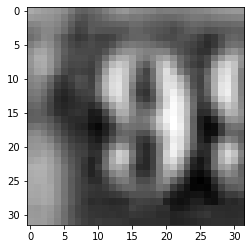

In [174]:
plt.imshow(X_TEST[5].reshape(32,32),cmap='gray')

print(CLASS_X[5])

5


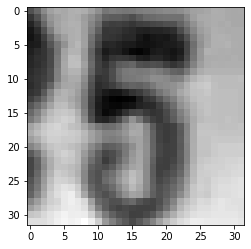

In [175]:
plt.imshow(X_TEST[50].reshape(32,32),cmap='gray')

print(CLASS_X[50])

3


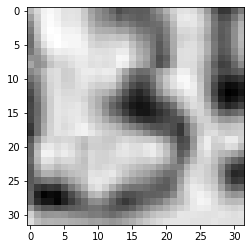

In [177]:
plt.imshow(X_TEST[150].reshape(32,32),cmap='gray')

print(CLASS_X[150])

9


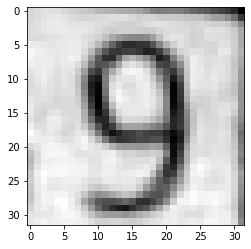

In [178]:
plt.imshow(X_TEST[119].reshape(32,32),cmap='gray')

print(CLASS_X[119])

In [180]:
MODEL_FIN.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 1024)              1049600   
                                                                 
 activation_42 (Activation)  (None, 1024)              0         
                                                                 
 dense_119 (Dense)           (None, 256)               262400    
                                                                 
 activation_43 (Activation)  (None, 256)               0         
                                                                 
 dense_120 (Dense)           (None, 512)               131584    
                                                                 
 activation_44 (Activation)  (None, 512)               0         
                                                                 
 dense_121 (Dense)           (None, 256)             

In [184]:
print('TRAINING SCORE USING FINAL MODEL: ', MODEL_FIN.evaluate(X_TRAIN, Y_TRAIN, verbose=0))

print('\n\nTESTING SCORE USING FINAL MODEL: ', MODEL_FIN.evaluate(X_TEST, Y_TEST, verbose=0))

TRAINING SCORE USING FINAL MODEL:  [0.06799362599849701, 0.9801190495491028]


TESTING SCORE USING FINAL MODEL:  [0.9668534994125366, 0.8192777633666992]


In [189]:
print(MODEL_FIN_DF.describe())

             loss    accuracy    val_loss  val_accuracy
count  100.000000  100.000000  100.000000    100.000000
mean     0.350767    0.886814    0.844765      0.785311
std      0.189227    0.061690    0.153564      0.027488
min      0.113372    0.721643    0.688915      0.671167
25%      0.203987    0.845619    0.758220      0.772028
50%      0.301088    0.902310    0.805437      0.793972
75%      0.477192    0.935131    0.881598      0.804917
max      0.843926    0.963524    1.932626      0.819278


    * FINAL MODEL HAS PERFORMED WITH AVERAGE ACCURACY OF 88.68% FOR TRAINING DATA AND 78.53% FOR TESTING DATA
    
    * AVERAGE LOSS OF THE MODEL 0.35 FOR TRAINING DATA AND 0.84 FOR TESTING DATA
    
    * MAXIMUM ACCURACY ACHIEVED BY THE MODEL FOR TRAINING DATA IS 96.35% 
    
    * MAXIMUM ACCURACY ACHIEVED BY THE MODEL FOR TESTING DATA IS 81.92%

# D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

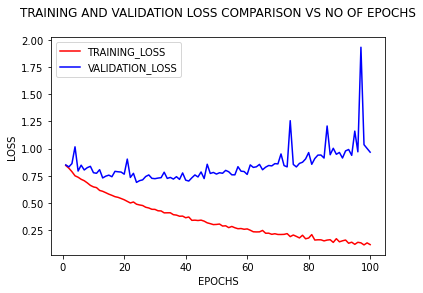

In [191]:
TRAINING_LOSS = MODEL_FIN_DF['loss']
VALIDATION_LOSS = MODEL_FIN_DF['val_loss']
EPOCHS = np.arange(1,101)
plt.plot(EPOCHS, TRAINING_LOSS, 'r', label='TRAINING_LOSS')
plt.plot(EPOCHS, VALIDATION_LOSS, 'b', label='VALIDATION_LOSS')
plt.title('TRAINING AND VALIDATION LOSS COMPARISON VS NO OF EPOCHS\n')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

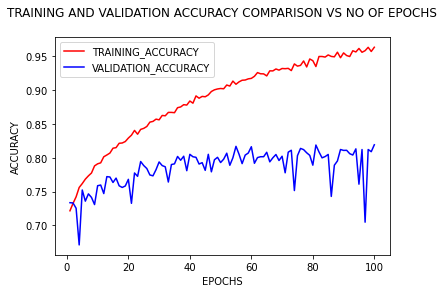

In [192]:
TRAINING_ACC = MODEL_FIN_DF['accuracy']
VALIDATION_ACC = MODEL_FIN_DF['val_accuracy']
EPOCHS = np.arange(1,101)
plt.plot(EPOCHS, TRAINING_ACC, 'r', label='TRAINING_ACCURACY')
plt.plot(EPOCHS, VALIDATION_ACC, 'b', label='VALIDATION_ACCURACY')
plt.title('TRAINING AND VALIDATION ACCURACY COMPARISON VS NO OF EPOCHS\n')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

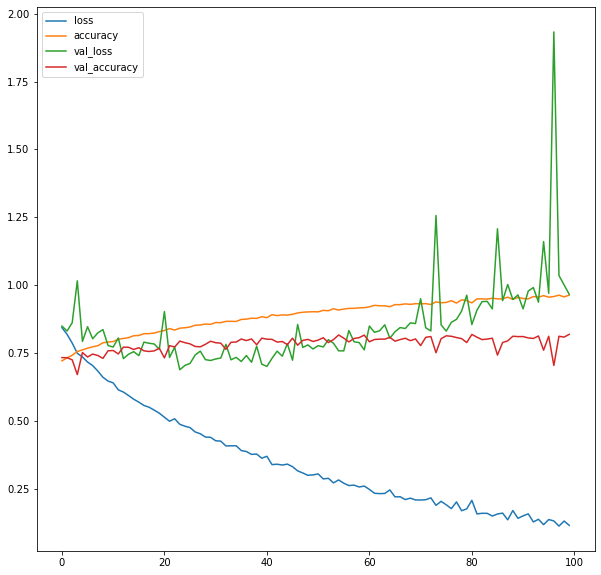

In [197]:
MODEL_FIN_DF.plot(figsize=(10,10))

plt.show()

    * TRAINING LOSS AND ACCURACY FOLLOW A PROPER CURVE UPWARD OR DOWNWARD.
    
    * TRAINING LOSS IS DECREASING OVER NO OF EPOCHS INCREASED.
    
    * TRAINING ACCURACY IS INCREASED AS THE NO OF EPOCHS INCREASED
    
    * TESTING DATA ACCURACY, LOSS IS NOT A PROPER CURVE AND VARIES TO HIGH AND LOW AT DIFFERENT EPOCHS.
    
    * WE HAVE USED DIFFERENT PARAMETERS AND TRAINED THE MODEL AND WE COULD SEE A SLIGHT IMPROVEMENT

                        **************END OF SOLUTION FOR NEURAL NETWORK PROBLEM STATEMENT*************